### Instalação de algumas bibliotecas 

In [1]:
!pip install pandas-profiling

  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [2]:
!pip install imblearn

In [3]:
!pip install ipywidgets

### Sumarização

In [4]:
from pandas_profiling import ProfileReport

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
fraud_detection = pd.read_csv('creditcard.csv')
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
#executando a função que gera o relatório
#profile = ProfileReport(fraud_detection, title = 'Sumarização Credit Card Fraud Detection')
#visualização do relatório
#profile

In [9]:
#profile.to_file("mlg-ulb.html")

In [10]:
#fraud_detection_BR = pd.read_csv('olist_order_payments_dataset.csv')
#fraud_detection_BR.head()

In [11]:
#executando a função que gera o relatório
#profile2 = ProfileReport(fraud_detection_BR, title = 'Sumarização Credit Card Payments Ecommerce BR')
#visualização do relatório
#profile2

In [12]:
#rofile2.to_file("olist-br.html")

### IMBALANCED RATIO

In [13]:
from sklearn.model_selection import train_test_split
features = pd.concat([fraud_detection.loc[:,'V1':'Amount'],fraud_detection.loc[:,'Time']],axis=1)
labels = fraud_detection['Class']

X_train,X_test,y_train,y_test = train_test_split(features,labels, stratify=labels,test_size=0.35, random_state=1)

print('y_train class counts')
print(y_train.value_counts())
print('')
print('y_test class counts')
print(y_test.value_counts())


# Let's store our y_test legit and fraud counts for normalization purposes later on
y_test_legit = y_test.value_counts()[0]
y_test_fraud = y_test.value_counts()[1]

y_train class counts
0    184804
1       320
Name: Class, dtype: int64

y_test class counts
0    99511
1      172
Name: Class, dtype: int64


### O imbalanced ratio de um dataset é uma medida da desigualdade de distribuição de classes em um conjunto de dados.  Ele é calculado como a razão entre a classe majoritária e a classe minoritária no conjunto de dados. Para calcular o imbalanced ratio de um conjunto de dados em Python, você pode usar o seguinte código:


In [14]:
from collections import Counter

# Calcule o número de exemplos em cada classe
label_counts = Counter(labels)

# Obtenha o número de exemplos da classe majoritária e minoritária
majority_class_count = max(label_counts.values())
print("O número da classe majoritária é:", majority_class_count)
minority_class_count = min(label_counts.values())
print("O número da classe minoritária é:", minority_class_count)

# Calcule o imbalanced ratio
imbalanced_ratio = majority_class_count / minority_class_count
print("O valor do imbalanced ratio é:", imbalanced_ratio)

O número da classe majoritária é: 284315
O número da classe minoritária é: 492
O valor do imbalanced ratio é: 577.8760162601626


### Aqui, "labels" é uma lista de rótulos (isto é, classes) para cada exemplo no conjunto de dados. O código acima usa a função Counter do módulo collections para contar o número de exemplos em cada classe e, em seguida, calcula a razão entre a classe majoritária e a classe minoritária.  Espero que isso ajude! Se você tiver alguma dúvida adicional, por favor, pergunte.

### TOY EXEMPLO  - MACHINE LEARNING

Aqui está um exemplo de um pipeline completo que inclui a treinamento de vários modelos de classificação binária e a avaliação do desempenho de cada um com as métricas de avaliação especificadas:

In [15]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

In [17]:
# Dividir os dados em features e labels
X = fraud_detection.drop("Class", axis=1)
y = fraud_detection["Class"]

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir os dados em treinamento e teste usando o StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.7, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(85442, 30) (199365, 30) (85442,) (199365,)


In [20]:
# Dividir os dados em treinamento e teste usando o StratifiedShuffleSplit
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=0)
for train_index, val_index in sss_val.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

In [21]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(242085, 30) (42722, 30) (242085,) (42722,)


In [22]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score


# Crie uma lista com os modelos a serem treinados
models = [LogisticRegression(), DecisionTreeClassifier(),
          KNeighborsClassifier(), SVC(), RandomForestClassifier(),
          xgb.XGBClassifier()]

# Crie uma lista para armazenar os resultados de cada modelo
results = []

# Treine cada modelo e avalie o desempenho
for model in models:
    # Treine o modelo com os dados de treinamento e avalie o desempenho com cross-validation
    scores = cross_val_score(model, X_val, y_val, cv=5)
    
    # Faça previsões com o conjunto de teste
    model.fit(X_val, y_val)
    y_pred = model.predict(X_val)
    
    # Calcule as métricas de avaliação
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    ballance_accuracy = balanced_accuracy_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_val, y_pred, average='macro')
    roc_auc = roc_auc_score(y_val, y_pred)
    
    # Armazene os resultados para cada modelo
    results.append({
        'Model': model.__class__.__name__,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Balanced Accuracy': ballance_accuracy,
        'Accuracy': accuracy,
        'Precision Macro': precision_macro,
        'Recall Macro': recall_macro,
        'F1 Macro': f1_macro,
        'ROC AUC': roc_auc
    })

[21:10:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:10:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:10:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [23]:
#Pegar a média dos resultados/ intervalo de confiança
# Encontre o comprimento máximo do nome do modelo
max_model_length = max(len(result['Model']) for result in results)

# Imprima os resultados em formato de tabela
for result in results:
    print(result['Model'].ljust(max_model_length), '{:.4f}'.format(result['Precision']), '{:.4f}'.format(result['Recall']),
          '{:.4f}'.format(result['F1 Score']), '{:.4f}'.format(result['Balanced Accuracy']), '{:.4f}'.format(result['Accuracy']),
          '{:.4f}'.format(result['Precision Macro']), '{:.4f}'.format(result['Recall Macro']), '{:.4f}'.format(result['F1 Macro']),
          '{:.4f}'.format(result['ROC AUC']), sep='\t')

LogisticRegression    	0.8600	0.5811	0.6935	0.7905	0.9991	0.9296	0.7905	0.8466	0.7905
DecisionTreeClassifier	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000
KNeighborsClassifier  	0.9123	0.7027	0.7939	0.8513	0.9994	0.9559	0.8513	0.8968	0.8513
SVC                   	1.0000	0.7838	0.8788	0.8919	0.9996	0.9998	0.8919	0.9393	0.8919
RandomForestClassifier	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000
XGBClassifier         	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000


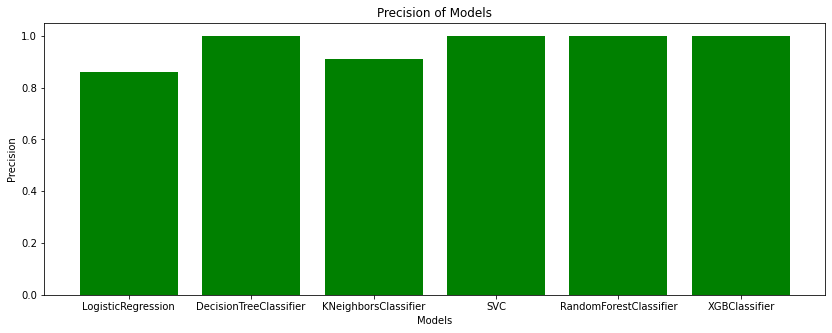

In [24]:
import matplotlib.pyplot as plt

#armazenando as precisões em uma lista
precisions = [result['Precision'] for result in results]

#criando uma lista com o nome de cada modelo
model_names = [result['Model'] for result in results]

plt.figure(figsize=(14, 5))
plt.bar(model_names, precisions, color = 'green')
plt.title('Precision of Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.show()

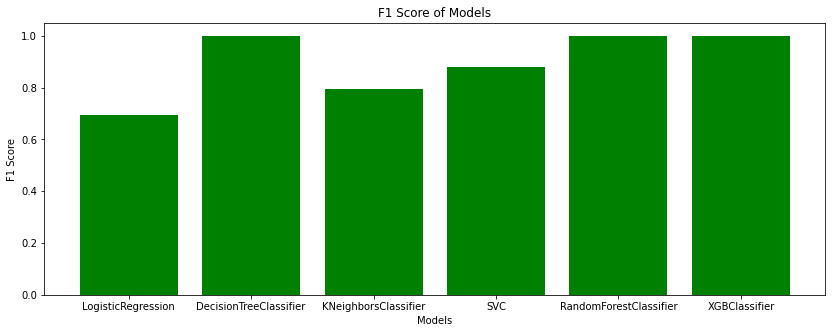

In [25]:
import matplotlib.pyplot as plt

#armazenando as precisões em uma lista
precisions = [result['F1 Score'] for result in results]

#criando uma lista com o nome de cada modelo
model_names = [result['Model'] for result in results]

plt.figure(figsize=(14, 5))
plt.bar(model_names, precisions, color = 'green')
plt.title('F1 Score of Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

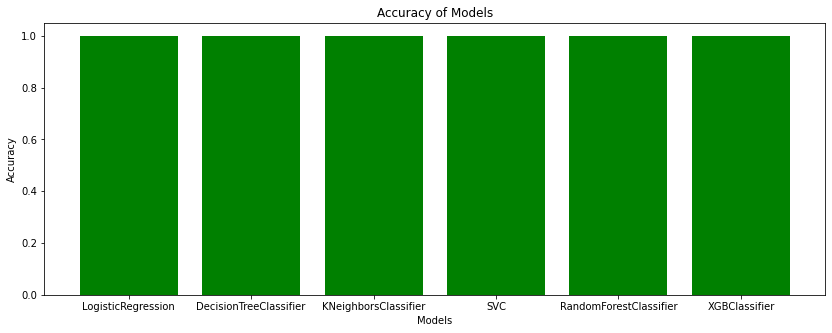

In [26]:
import matplotlib.pyplot as plt

#armazenando as precisões em uma lista
precisions = [result['Accuracy'] for result in results]

#criando uma lista com o nome de cada modelo
model_names = [result['Model'] for result in results]

plt.figure(figsize=(14, 5))
plt.bar(model_names, precisions, color = 'green')
plt.title('Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

#### EXPORTAÇÃO DOS RESULTADOS

In [27]:
import pandas as pd

# Crie um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Salve o DataFrame em um arquivo CSV
results_df.to_csv('results_ML_crossValidation.csv', index=False)


### DEEP LEARNING

##### CNN - Experimentos

In [28]:
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, Dropout, MaxPooling1D, Flatten, Dense

In [29]:
#justificar seleção do modelo 
def create_classificador():
    classificador = Sequential()

    classificador.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(30, 1)))
    classificador.add(BatchNormalization())
    classificador.add(Dropout(0.5))
    classificador.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(30, 1)))
    classificador.add(BatchNormalization())
    classificador.add(MaxPooling1D(pool_size = (2)))
    classificador.add(Dropout(0.25))
    classificador.add(Flatten())

    classificador.add(Dense(32, activation='relu'))
    classificador.add(Dropout(0.2))
   
    classificador.add(Dense(1, activation='sigmoid'))

    classificador.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return classificador

### Precisei fazer essa verificação das dimensões dos dados de entrada comparando-as com as dimensões esperadas pelo modelo na camada de entrada (input_shape).

In [31]:
classificador = create_classificador()

In [32]:
input_shape = classificador.layers[0].input_shape
print(input_shape)
input_shape = classificador.layers[3].input_shape
print(input_shape)


(None, 30, 1)
(None, 29, 32)


In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)


(242085, 30)
(242085,)
(199365, 30)
(199365,)
(42722, 30)
(42722,)


In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_ajust.shape)
print(y_ajust.shape)
print(X_val.shape)
print(y_val.shape)


(242085, 30)
(242085,)
(199365, 30)
(199365,)


NameError: name 'X_ajust' is not defined

In [35]:
#repetir o experimento n vezes
#early stopping
#classificador = create_classificador()
#X_train y_train 
#Tentei fazer o experimento rodar no conjunto de treinamento de validação mas não deu muito certo.
history = classificador.fit(X_ajust, y_ajust, validation_data=(X_val, y_val), epochs=14, batch_size = 256)

NameError: name 'X_ajust' is not defined

In [ ]:
resultado = classificador.evaluate(X_test, y_test)
resultado

In [ ]:
#Plots da acurácia do modelo
plt.plot(history.history['accuracy'],label = 'treino')
plt.plot(history.history['val_accuracy'],label = 'validação')
plt.axhline(y=resultado[1], color='r', linestyle='--',label = 'teste')
plt.title('Acurácia durante as épocas')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.ylim((0.0,2))
plt.legend(loc='upper left')
plt.savefig('graficoteste25.png', dpi=300)

In [ ]:
#Plots do valor de perda do modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do modelo')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend(['treino', 'teste'], loc='upper left')
plt.savefig('graficoloss25.png',dpi=300)

In [ ]:
#probabilidades de predição de cada classse (valores)
y_predicted_probs = classificador.predict(X_test)
y_predicted_probs

In [ ]:
#probabilidades de cada classse (labels) analisar a linha de classificação
y_predicted = (classificador.predict(X_test) > 0.5).astype("int32").ravel()
y_predicted

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#matrix de confusão(conferir a ordem)
tp, fp, fn, tn = confusion_matrix(y_test, y_predicted).ravel()

In [ ]:
#acuracia
acc = accuracy_score(y_test, y_predicted)
acc

In [ ]:
# calculo da acuracia ( verificacao)
(tp+ tn)/ (tp + tn + fp + fn) 

In [ ]:
#roc auc 
auc = roc_auc_score(y_test, y_predicted_probs)
auc

In [ ]:
#fpr ( false positive rate) ou taxa de falsos alarmes
(fp / (fp+tn))

In [ ]:
#precisao
(tp / (tp + fp))

In [ ]:
#calculo do recall
(tp / (tp+fn))

In [ ]:
#import seaborn as sns
#sns.heatmap(cm, annot = True)


### Quis mostrar as métricas que são calculadas a partir da matriz de confusão acima
### Agora irei mostrar os resultados de outra forma

In [ ]:
# Crie uma lista para armazenar os resultados de cada modelo
results = []

In [ ]:
# Calcule as métricas de avaliação
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
ballance_accuracy = balanced_accuracy_score(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_predicted, average='macro')
roc_auc = roc_auc_score(y_test, y_predicted)


In [ ]:
print('Precision:\n', precision, sep='\t')
print('Recall:\n', recall, sep='\t')
print('F1 Score:\n', f1,sep='\t')
print('Balanced Accuracy:\n', ballance_accuracy,sep='\t')
print('Precision Macro:\n', precision_macro, sep='\t')
print('Accuracy:\n', accuracy,sep='\t')
print('Precision Macro:\n', precision_macro, sep='\t')
print('Recall Macro:\n', recall_macro, sep='\t')
print('F1 Macro:\n', f1_macro, sep='\t')
print('ROC AUC:\n', roc_auc,sep='\t')

In [ ]:
metrics = {
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Balanced Accuracy': ballance_accuracy,
    'Accuracy': accuracy,
    'Macro Precision': precision_macro,
    'Macro Recall': recall_macro,
    'Macro F1-score': f1_macro,
    'ROC AUC': roc_auc
}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
print(metrics_df)


In [ ]:
# Salve o DataFrame em um arquivo CSV
metrics_df.to_csv('results_tentativas_CNN.csv', index=False)

### Cnn + CrossValidation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalAveragePooling1D
from sklearn.model_selection import KFold

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, Dropout, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import KFold

In [ ]:
def kfold_validation(X, y, k):
    kf = KFold(n_splits=k)
    scores = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        classificador = create_classificador()
        classificador.fit(X_train, y_train, epochs=14, batch_size=256)
        score = classificador.evaluate(X_val, y_val)
        scores.append(score[1])
    return np.mean(scores)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

In [ ]:
X_train = X_train.reshape(242085, 30, 1)
y_train = y_train.reshape(242085,1)
X_test = X_test.reshape(56962, 30, 1)
y_test = y_test.reshape(56962, 1)
X_ajust = X_ajust.reshape(205060, 30, 1)
y_ajust = y_ajust.to_numpy().reshape(205060, 1)
X_val = X_val.to_numpy().reshape(22785, 30, 1)
y_val = y_val.reshape(22785, 1)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_ajust.shape)
print(y_ajust.shape)
print(X_val.shape)
print(y_val.shape)


In [ ]:
# Dividir os dados em features e labels
X = fraud_detection.drop("Class", axis=1)
y = fraud_detection["Class"]

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))


In [ ]:
#Executar a validação k-fold com 10 folds
result = kfold_validation(X, y, 10)
print("Acurácia média: ", result)

In [ ]:
#justificar seleção do modelo 
def create_classificador_CrossValidation():
    classificador_cnn = Sequential()

    classificador_cnn.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    classificador_cnn.add(MaxPooling1D(pool_size=2))
    classificador_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    classificador_cnn.add(MaxPooling1D(pool_size=2))
    classificador_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
    classificador_cnn.add(GlobalAveragePooling1D())
    classificador_cnn.add(MaxPooling1D(pool_size = (2)))
    classificador_cnn.add(Dropout(0.5))

   
    classificador_cnn.add(Dense(1, activation='sigmoid'))

    classificador_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return classificador_cnn

In [ ]:

# Train the model
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
history = model_cnn.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Define the BaseLine model
model_baseline = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_baseline.fit(X_train, y_train, batch_size=64, epochs=20, validation_


In [ ]:
#repetir o experimento n vezes
#early stopping
classificador = create_classificador_CrossValidation()
#X_train y_train 
#Tentei fazer o experimento rodar no conjunto de treinamento de validação mas não deu muito certo.
history = classificador.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size = 64)

In [ ]:
resultado = classificador.evaluate(X_test, y_test)
resultado

In [ ]:

# Train the model
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
history = model_cnn.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))

# Evaluate the model
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Define the BaseLine model
model_baseline = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_baseline.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_baseline.fit(X_train, y_train, batch_size=64, epochs=20, validation_
